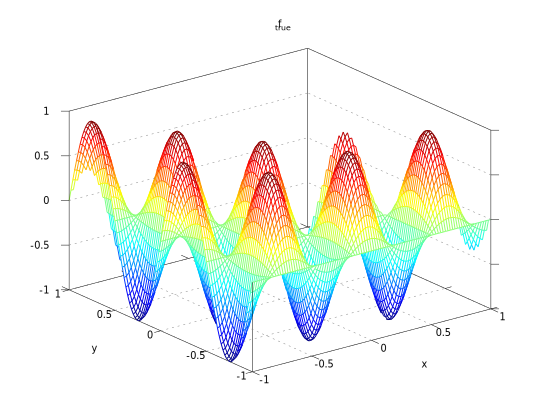

In [1]:
%% construct a toy function 
f = @(X) cos(3*X(:,1)) .* sin(2*X(:,2));
f_rescaled = @(X) f(X*pi);

n_max = 14;
U_ = make_polynomial_basis(2, n_max);
[Omega, x, y, idx] = make_domain_2d(.02, 'triangle');

to_square = @(v) reshape(v, sqrt(numel(x)), sqrt(numel(x)));

z = NaN*ones(size(x));
z(idx) = f_rescaled(Omega);


figure; 
mesh(to_square(x), to_square(y), to_square(z));
xlabel('x'); ylabel('y'); 

title('f_{true}');

[choose_magic]: choosing basis element 10 (of 120)
[choose_magic]: choosing basis element 20 (of 120)
[choose_magic]: choosing basis element 30 (of 120)
[choose_magic]: choosing basis element 40 (of 120)
[choose_magic]: choosing basis element 50 (of 120)
[choose_magic]: choosing basis element 60 (of 120)
[choose_magic]: choosing basis element 70 (of 120)
[choose_magic]: choosing basis element 80 (of 120)
[choose_magic]: choosing basis element 90 (of 120)
[choose_magic]: choosing basis element 100 (of 120)
[choose_magic]: choosing basis element 110 (of 120)
[choose_magic]: choosing basis element 120 (of 120)
Elapsed time is 21.3543 seconds.
[]: Lambda_M = 33.994
Elapsed time is 0.213473 seconds.


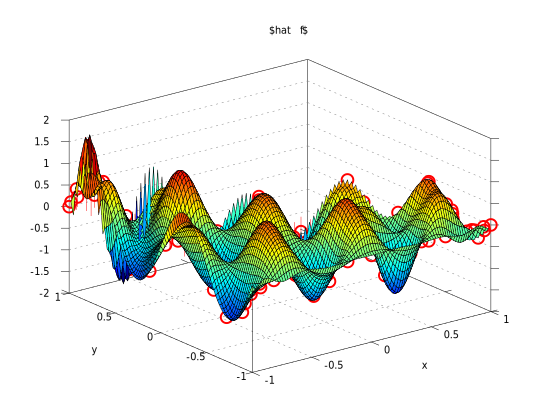

In [2]:
tic
[s, Lambda_M] = choose_magic(Omega, U_);
toc
fprintf('[%s]: Lambda_M = %0.3f\n', mfilename, Lambda_M);

tic
f_hat = interp_magic(f_rescaled, s);
toc

z_hat = NaN*ones(size(x));
z_hat(idx) = f_hat;


figure; 
surf(to_square(x), to_square(y), to_square(z_hat)); 
xlabel('x'); ylabel('y'); 
title('$\hat{f}$', 'interpreter', 'latex');
hold on;
stem3(s.Omega(s.x,1), s.Omega(s.x,2), f_rescaled(s.Omega(s.x,:)), 'ro');
hold off;

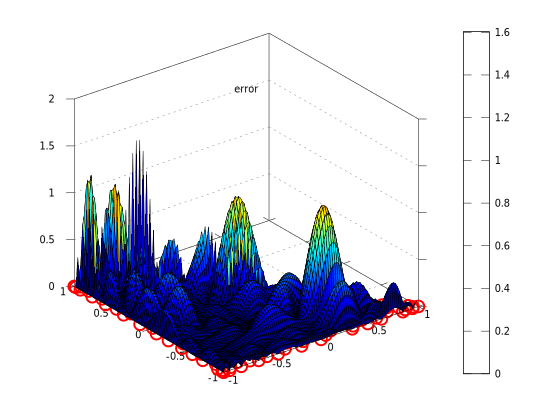

In [3]:
figure; 
surf(to_square(x), to_square(y), to_square(abs(z-z_hat)));
title('error');
colorbar();
hold on;
stem3(s.Omega(s.x,1), s.Omega(s.x,2), ...
      abs(f_rescaled(Omega(s.x,:))- f_hat(s.x)), 'ro');
hold off;